In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
file_path = 'Cleaned_Steam_Dataset.xlsx'  # Update with your dataset file path
data = pd.read_excel(file_path)

In [8]:
# Selecting features and target variable
X = data[['Game\'s Age (Days)', 'Price', 'Followers', 'User Reviews Count']]
y = data['Net Revenue (in million $)']

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Ridge Regression
ridge_param_grid = {'alpha': np.logspace(-3, 3, 50)}
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_scaled, y_train)

best_ridge = ridge_grid_search.best_estimator_
ridge_y_pred = best_ridge.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print("Ridge Regression Results")
print(f"Best alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"Mean Squared Error: {ridge_mse}")
print(f"R^2 Score: {ridge_r2}")

Ridge Regression Results
Best alpha: 3.5564803062231287
Mean Squared Error: 9173.457521983624
R^2 Score: 0.4078454044215689


In [16]:
# Lasso Regression
lasso_param_grid = {'alpha': np.logspace(-3, 3, 50)}
lasso = Lasso(max_iter=10000)
lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train_scaled, y_train)

best_lasso = lasso_grid_search.best_estimator_
lasso_y_pred = best_lasso.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)

print("\nLasso Regression Results")
print(f"Best alpha: {lasso_grid_search.best_params_['alpha']}")
print(f"Mean Squared Error: {lasso_mse}")
print(f"R^2 Score: {lasso_r2}")


Lasso Regression Results
Best alpha: 0.3727593720314938
Mean Squared Error: 9303.027204956661
R^2 Score: 0.39948156962577275


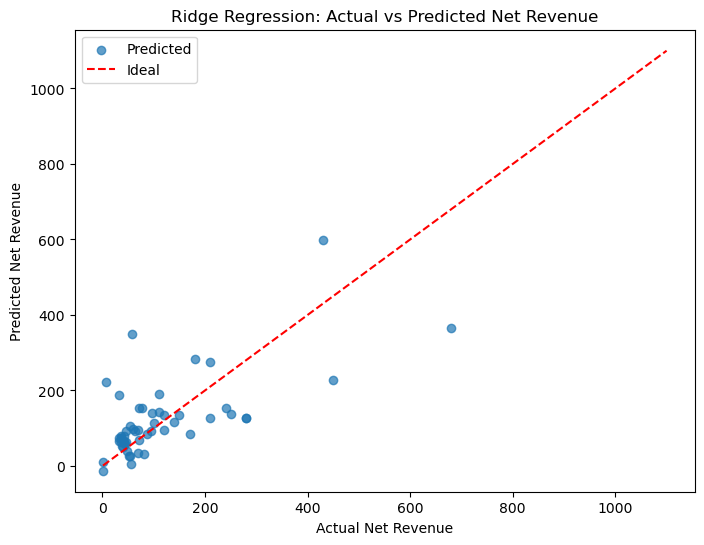

In [18]:
# Plotting Actual vs Predicted values for Ridge
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ridge_y_pred, alpha=0.7, label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Ideal')
plt.xlabel('Actual Net Revenue')
plt.ylabel('Predicted Net Revenue')
plt.title('Ridge Regression: Actual vs Predicted Net Revenue')
plt.legend()
plt.show()

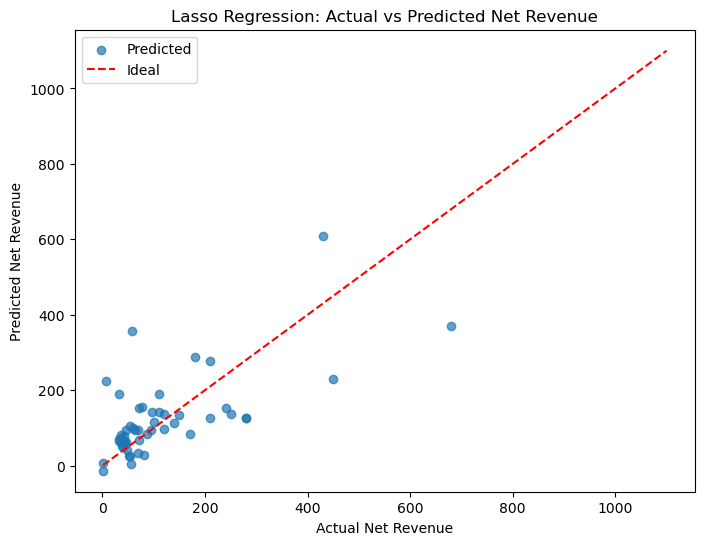

In [20]:
# Plotting Actual vs Predicted values for Lasso
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_y_pred, alpha=0.7, label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label='Ideal')
plt.xlabel('Actual Net Revenue')
plt.ylabel('Predicted Net Revenue')
plt.title('Lasso Regression: Actual vs Predicted Net Revenue')
plt.legend()
plt.show()

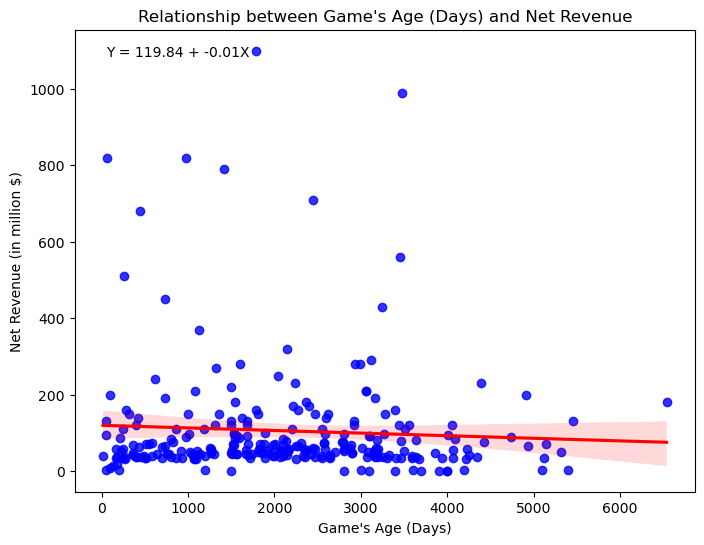

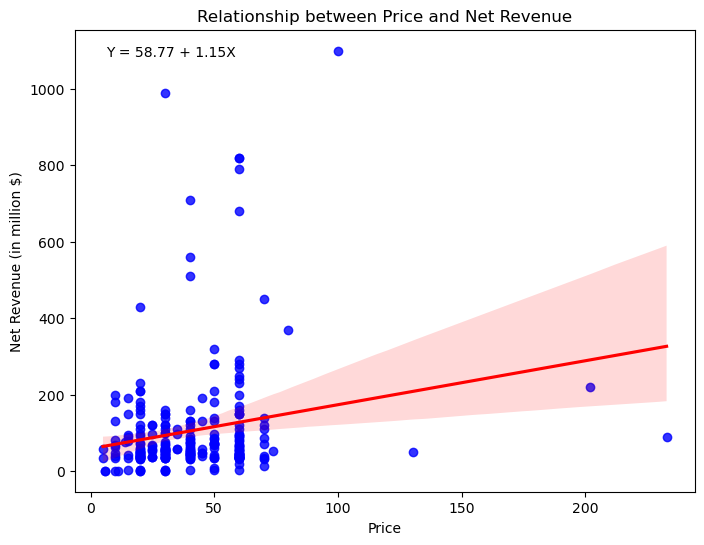

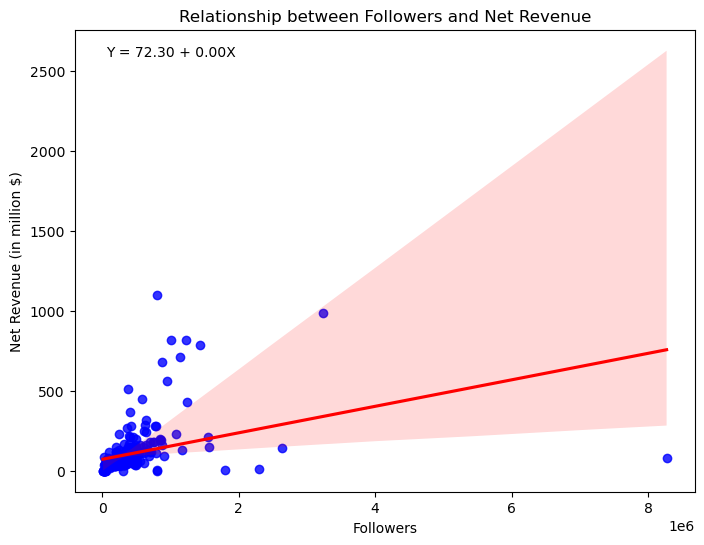

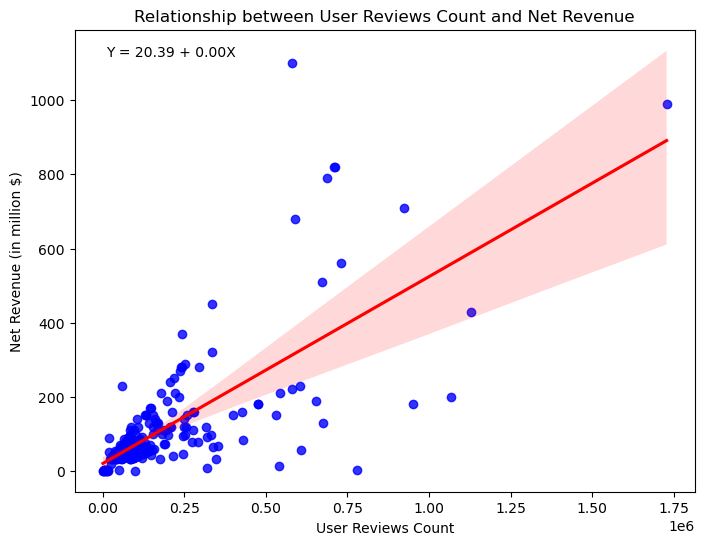

In [22]:
# Visualizing relationships between each feature and the target variable
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=data[feature], y=y, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    slope, intercept = np.polyfit(data[feature], y, 1)
    plt.text(0.05, 0.95, f'Y = {intercept:.2f} + {slope:.2f}X',
             horizontalalignment='left', verticalalignment='center',
             transform=plt.gca().transAxes)
    plt.title(f'Relationship between {feature} and Net Revenue')
    plt.xlabel(feature)
    plt.ylabel('Net Revenue (in million $)')
    plt.show()

In [24]:
# Predicting for a new game data sample
new_data = [[1500, 59.99, 500000, 800000]]  # Example input
new_data_scaled = scaler.transform(new_data)
new_ridge_prediction = best_ridge.predict(new_data_scaled)
new_lasso_prediction = best_lasso.predict(new_data_scaled)

print("\nPrediction for new data:")
print(f"Ridge Prediction: {new_ridge_prediction[0]}")
print(f"Lasso Prediction: {new_lasso_prediction[0]}")


Prediction for new data:
Ridge Prediction: 472.08032236974935
Lasso Prediction: 478.9983186450196


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
Prediction for New Data:
For a game with the following characteristics:
Age: 1500 days
Price: $59.99
Followers: 500,000
User Reviews Count: 800,000
Predicted Net Revenue for Ridge: $472.08 million
Predicted Net Revenue for Lasso: $478.99 million